# Natual Language Processing - 
## Donald Trump's Tweets from 2009 to 2020 with PySpark
### Group member :
Michael WARNER  
Suet Wah CHU   
Jing Fei XU   

### Table of Content :
1) Executive Summary

2) Overall Analysis  
   - Top hashtags (#)  
   - Top references (@)  
   - Sentiment Analysis  
   - Hot topics    

3) Original Tweet Analysis 
   - Top hashtags (#)
   - Top references (@)
   - Sentiment Analysis
   - Hot topics  
   
4) Retweet Analysis 
   - Top hashtags (#)
   - Top references (@)
   - Sentiment Analysis
   - Hot topics  
   
5) Tweet Analysis by Year
   - Hot topics  
   
6) Conclusion


## 1) Executive Summary

### Purpose : 
Donald Trump's use of Twitter has been a controversial topic for years and it draws lots of attention as people try to get a deeper understanding and do interpretation on his tweets. Sometimes his tweets are a good indicator of the political and current trend with the first-hand data source from him. In this study, the sentiment and hot topics of Donald Trump’s tweets will be analyzed for the period of 2009 to November 2020.

### Methods of Analysis:
This study will explore the sentiment of the tweets by looking at the occurrence of both positive and negative words. The hot topics will be broken down in 2 aspects: by original tweets and retweets, by years.



### Findings:
Donald Trump started to be **active** on Twitter since **2012** with a dramatic increase in tweets. His tweets keep increasing to a **peak** in **2020** with over 11,000 tweets. The number of original tweets are almost **5 times** of retweets.   
In terms of hot topics, he had **more diversified** topics, from personal life to politics, between 2012 and 2015 whereas he **focused on political** topics after 2015.  


For original tweets and retweets, the hot topics over 12 years are basically the same except **retweets** cover the **impeachment** of himself in details. Same phenomenon is found for the negative words he used that **more negative word**s related to **impeachment** are used for **retweets**. About **positive words**, Donald Trump shows more **frequent appreciation** to other in **retweets** than in his original tweets.  

Regarding to **hashtags**, Donald trump tags **current affairs (including COVID-19)** instead of his presidential election in his **retweets**. Moreover, the **references** of his **retweets** are either **Republican** or government officials or his relatives whereas his **original** tweet references are **more diversified**.


Overall, Donald Trump’s tweets are positive with the **positive sentiment score** calculated for both original tweets and retweets.

### Further Study :
Since **different references and hashtags** have been used for original tweets and retweets, it would be interesting to investigate the relationship between the hashtags and references, the topics and the references(i.e. the referenced person and the topics). Due to limited time, these relationship could be inclued in the future studies.

## 2) Overall Analysis


### Pre-process the data

In [1]:
## Import PySpark and build a connection between the Spark Cluster and the running application
import pyspark
sc = pyspark.SparkContext(appName="Spark Donald Trump Communication Analysis on Twitter")

In [2]:
## first read the trump_tweets.txt file into the RDD rdd_tweets

rdd_tweets = sc.textFile('trump_tweets.txt')

# print a sample of 10 lines of rdd_tweets

rdd_tweets.take(10)

['Republicans and Democrats have both created our economic problems.;02/08/2011 18:07:48',
 'I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardworking American Patriots who love our Country, cherish our values, respect our laws, and always put AMERICA FIRST! Thank you for a wonderful evening!! #KAG2020 https://t.co/dNJZfRsl9y;03/03/2020 01:34:50',
 'RT @CBS_Herridge: READ: Letter to surveillance court obtained by CBS News questions where there will be further disciplinary action and cho…;17/01/2020 03:22:47',
 'The Unsolicited Mail In Ballot Scam is a major threat to our Democracy, &amp  the Democrats know it. Almost all recent elections using this system, even though much smaller &amp   with far fewer Ballots to count, have ended up being a disaster. Large numbers of missing Ballots &amp  Fraud!;12/09/2020 20:10:58',
 "RT @MZHemingway: Very friendly telling of events here about Comey's apparent leaking to compliant media. If you read those 

In [3]:
## Split each tweet into a list of string (1)

# Import Regular Expressions library
import re

# Define a function to split the tweets into a word list
def split_with_multiple_separator(string_value): 
     return re.compile(r'(?<!\d{2}):|(?<!\w)\.(?!\w)|,| |\[|\]|;|\"|!|--|–|“|(?=\.\s)|(?=\.;)')\
                     .split(string_value.strip())
                    # Negative lookahead assertion : '(?<!\d{2}):' for time (hh:mm:ss) ;
                    #                            '(?<!\w)\.(?!\w)' for specific word with '.' in bewtween (e.g. U.S.)
                    # Positive lookahead assertion : '(?=\.\s)' for full stop followed by whitespace
                    #                                '(?=\.;)' for full stop followed by a colon(:)
                    # Other will be splited by , or [ or ] or ; or "or ! or -- or – or “
                        

In [4]:
## Split each tweet into a list of string (2)

# Split the tweets into a word list and filter the punctuation
rdd_tweets_words = rdd_tweets.flatMap(split_with_multiple_separator).filter(lambda word: word!='' and word!='”' and word!='.')
rdd_tweets_words.take(60)

['Republicans',
 'and',
 'Democrats',
 'have',
 'both',
 'created',
 'our',
 'economic',
 'problems',
 '02/08/2011',
 '18:07:48',
 'I',
 'was',
 'thrilled',
 'to',
 'be',
 'back',
 'in',
 'the',
 'Great',
 'city',
 'of',
 'Charlotte',
 'North',
 'Carolina',
 'with',
 'thousands',
 'of',
 'hardworking',
 'American',
 'Patriots',
 'who',
 'love',
 'our',
 'Country',
 'cherish',
 'our',
 'values',
 'respect',
 'our',
 'laws',
 'and',
 'always',
 'put',
 'AMERICA',
 'FIRST',
 'Thank',
 'you',
 'for',
 'a',
 'wonderful',
 'evening',
 '#KAG2020',
 'https',
 '//t.co/dNJZfRsl9y',
 '03/03/2020',
 '01:34:50',
 'RT',
 '@CBS_Herridge',
 'READ']

In [5]:
## Delete the 'http://' contents (1)

#Create a function to delete "https"
delsite = ["https","//","http"]
def delhttps(line):
    for i in delsite:
        if i in line:
            return 1
    return 0


In [6]:
## Delete the 'http://' contents (2)

rdd_tweets_words_noweb = rdd_tweets_words.filter(lambda line: delhttps(line) != 1)
rdd_tweets_words_noweb.take(60)

['Republicans',
 'and',
 'Democrats',
 'have',
 'both',
 'created',
 'our',
 'economic',
 'problems',
 '02/08/2011',
 '18:07:48',
 'I',
 'was',
 'thrilled',
 'to',
 'be',
 'back',
 'in',
 'the',
 'Great',
 'city',
 'of',
 'Charlotte',
 'North',
 'Carolina',
 'with',
 'thousands',
 'of',
 'hardworking',
 'American',
 'Patriots',
 'who',
 'love',
 'our',
 'Country',
 'cherish',
 'our',
 'values',
 'respect',
 'our',
 'laws',
 'and',
 'always',
 'put',
 'AMERICA',
 'FIRST',
 'Thank',
 'you',
 'for',
 'a',
 'wonderful',
 'evening',
 '#KAG2020',
 '03/03/2020',
 '01:34:50',
 'RT',
 '@CBS_Herridge',
 'READ',
 'Letter',
 'to']

In [7]:
#transform all the words into lowercase
rdd_tweets_words_lower = rdd_tweets_words_noweb.flatMap(lambda word:word.lower().split())
rdd_tweets_words_lower.take(10)

['republicans',
 'and',
 'democrats',
 'have',
 'both',
 'created',
 'our',
 'economic',
 'problems',
 '02/08/2011']

### Overall Analysis - Total Number of Tweets

In [8]:
print (f'There are {rdd_tweets.count()} tweets in total from 2009 to 2020.') 

There are 58681 tweets in total from 2009 to 2020.


### Overall Analysis - Top Hashtags (#)
  

In general, the most frequently used hashtags are mainly about **2016 U.S. President Election** : 
1) **#Trump2016**  - a tag for presidential candidate Donald Trump in 2016  
2) **#Trump2016https** - same tag as above with the mistake of connecting the http together   
                    (i.e. no white space between the tag and the website link, refer to :https://twitter.com/hashtag/trump2016https)  

3) **#MAGA** - 'Make America Great Again' , the 2016 campaign slogan for presidential candidate Donald Trump    
4) **#MakeAmericaGreatAgain** - same as above  
5) **#AmericaFirst** - the major and overriding theme" of his administration during the 2016 election and                    the theme of Trump's inaugural address to his presidency  

Another hot topic is **Celebrity Apprentice** which is an American television reality competition series hosted by Donald Trump before his presidency ( for 2008-2015) with the following tags:  
1) **#CelebApprentice**  
2) **#CelebrityApprentice**  

His book ***Time to Get Tough: Making America #1 Again*** (original book title) or **Time to Get Tough: Make America Great Again!** (new book title) is frequently mentioned with the following tags:  
1) **#TimeToGetTough**  - title of Donald Trump's book   
2) **#1** - part of the original book title  

In [9]:
## Split each tweet into words (keeping @ and #)
words = rdd_tweets.flatMap(lambda word:re.split(',| |\[|\]|,|:|;|\.|\"', word.strip())).flatMap(lambda line: line.split(" "))

## Filter the words to get only hashtags
hashtags = words.filter(lambda w: '#' in w)

# Filter the words to get only hashtags, then map each hashtag to be a pair of (hashtag,1)
hashtags_tuple = hashtags.map(lambda x: (x, 1))
hashtags_tuple.take(10)

[('#KAG2020', 1),
 ('#MAGA', 1),
 ('#VOTE', 1),
 ('#MAGA🇺🇸🦅rally', 1),
 ('#VOTE', 1),
 ('#2A', 1),
 ('#VOTE', 1),
 ('#MAGA', 1),
 ('#VoteEarlyDay', 1),
 ('#MAGA🇺🇸', 1)]

In [10]:
## Top 10 Hashtags (#)

hashtags_count = hashtags_tuple.reduceByKey(lambda x,y : x+y).sortBy(lambda tuple: tuple[1], ascending=False)
hashtags_count.take(10)

[('#Trump2016', 695),
 ('#MAGA', 436),
 ('#MakeAmericaGreatAgain', 392),
 ('#CelebApprentice', 283),
 ('#1', 136),
 ('#CelebrityApprentice', 131),
 ('#TimeToGetTough', 95),
 ('#AmericaFirst', 76),
 ('#Trump', 74),
 ('#Trump2016https', 66)]

### Overall Analysis - Top References (@)

#### The references Donald Trump has been using can be categorized as :
##### 1) Himself, Republicans, his team  and political figures
- @realDonaldTrump - The offical Twitter account of President Trump  
- @TeamTrump   - The official Twitter account for the Trump Campaign (both 2016 and 2020)  
- @IvankaTrump - Donald Trump's daughter, serving as Advisor to the President Trump since 2017  
- @WhiteHouse  - The official Twitter account of US government   
- @seanhannity - Sean Patrick Hannity is a Republican talk show host and conservative political commentator; an early supporter of Donald Trump in the 2016 presidential election 
- @BarackObama - Member of the Democratic Party, the 44th president of the United States from 2009 to 2017

##### 2) News source / Media  
- @FoxNews       - Conservative(Leans Right) News
- @foxandfriends - The weekday morning news show of Fox News Channel
- @CNN           - Liberal(Leans Left ) News
    
##### 3) TV Show
- @ApprenticeNBC - Celebrity Apprentice, an American television reality competition series hosted by Donald Trump before his presidency (for 2008-2015) 

In [11]:
## Filter the words to get only references
references = words.filter(lambda w: '@' in w)

# Map each reference to be a pair of (reference,1)
references_tuple = references.map(lambda x: (x, 1))
references_tuple.take(10)

[('@CBS_Herridge', 1),
 ('@MZHemingway', 1),
 ('@WhiteHouse', 1),
 ('@realDonaldTrump', 1),
 ('@EricTrump', 1),
 ('@GOPChairwoman', 1),
 ('@realDonaldTrump', 1),
 ('@TomFitton', 1),
 ('@RealDonaldTrump', 1),
 ('@marklevinshow', 1)]

In [12]:
## Top 10 references (@)

references_count = references_tuple.reduceByKey(lambda x,y : x+y).sortBy(lambda tuple: tuple[1], ascending=False)
references_count.take(10)

[('@realDonaldTrump', 10486),
 ('@FoxNews', 876),
 ('@WhiteHouse', 793),
 ('@foxandfriends', 690),
 ('@BarackObama', 563),
 ('@CNN', 377),
 ('@ApprenticeNBC', 364),
 ('@TeamTrump', 294),
 ('@IvankaTrump', 288),
 ('@seanhannity', 266)]

### Overall Analysis - Sentiment Analysis
### Top Positive Words


In [13]:
## Initialize an rdd with key/value for counting each word in the cleaned RDD 

# Add the count to the word as a tuple
rdd_tweets_words_kv = rdd_tweets_words_lower.map(lambda word: (word, 1))

rdd_tweets_words_kv.take(10)

[('republicans', 1),
 ('and', 1),
 ('democrats', 1),
 ('have', 1),
 ('both', 1),
 ('created', 1),
 ('our', 1),
 ('economic', 1),
 ('problems', 1),
 ('02/08/2011', 1)]

In [14]:
## Read the positive words file

rdd_positive_words = sc.textFile('positive-words.txt')

# Initialize an rdd with key/value for counting each positive word in the file 

rdd_positive_words_kv = rdd_positive_words.map(lambda word: (word, 1))

rdd_positive_words_kv.take(5)

[('a+', 1), ('abound', 1), ('abounds', 1), ('abundance', 1), ('abundant', 1)]

In [15]:
## Join the cleaned word list with the positive word list
# Use the mapValues transformation to assign a default count of 1 for each positive word

rdd_positive_words_tweets_kv = rdd_tweets_words_kv.join(rdd_positive_words_kv).mapValues(lambda tuple: 1)

## Count the number of occurences of each positive word in tweets

rdd_positive_words_tweets_count_kv = rdd_positive_words_tweets_kv.reduceByKey(lambda x,y : x+y)

rdd_positive_words_tweets_count_kv.take(5)

[('thrilled', 51),
 ('wonderful', 482),
 ('right', 897),
 ('sustainable', 3),
 ('best', 1236)]

In [23]:
## Top 25 Positive Words

rdd_positive_words_tweets_count_kv_ordered = rdd_positive_words_tweets_count_kv.sortBy(lambda tuple: tuple[1], ascending=False)

list_top_positives_opinion = rdd_positive_words_tweets_count_kv_ordered.take(25)
list_top_positives_opinion

[('great', 7413),
 ('trump', 5898),
 ('thank', 3516),
 ('like', 1992),
 ('thanks', 1875),
 ('good', 1810),
 ('best', 1236),
 ('love', 1151),
 ('win', 1071),
 ('work', 983),
 ('true', 943),
 ('right', 897),
 ('better', 840),
 ('well', 733),
 ('strong', 725),
 ('real', 672),
 ('support', 661),
 ('amazing', 643),
 ('congratulations', 598),
 ('happy', 579),
 ('nice', 563),
 ('honor', 499),
 ('wow', 497),
 ('wonderful', 482),
 ('endorsement', 460)]

### Top Negative Words

In [17]:
## Read the positive words file

rdd_negative_words = sc.textFile('negative-words.txt')

# initialize an rdd with key/value for counting each negative word in the file 

rdd_negative_words_kv = rdd_negative_words.map(lambda word: (word, 1))

rdd_negative_words_kv.take(5)

[('2-faced', 1),
 ('2-faces', 1),
 ('abnormal', 1),
 ('abolish', 1),
 ('abominable', 1)]

In [18]:
## Join the cleaned word list with the negative word list
# Use the mapValues transformation to assign a default count of 1 for each negative word

rdd_negative_words_tweets_kv = rdd_tweets_words_kv.join(rdd_negative_words_kv).mapValues(lambda tuple:1)

rdd_negative_words_tweets_kv.take(5)

[('threat', 1), ('threat', 1), ('threat', 1), ('threat', 1), ('threat', 1)]

In [19]:
## Count the number of occurences of each negative word in tweets

rdd_negative_words_tweets_count_kv = rdd_negative_words_tweets_kv.reduceByKey(lambda x,y: x+y)

rdd_negative_words_tweets_count_kv.take(5)

[('threat', 84),
 ('disaster', 298),
 ('fraud', 196),
 ('worse', 231),
 ('dishonest', 205)]

In [24]:
## Top 25 Negative Words

rdd_negative_words_tweets_count_kv_ordered = rdd_negative_words_tweets_count_kv.sortBy(lambda tuple: tuple[1], ascending=False)

list_top_negatives_opinion = rdd_negative_words_tweets_count_kv_ordered.take(25)

list_top_negatives_opinion

[('fake', 1210),
 ('bad', 987),
 ('hard', 746),
 ('crime', 541),
 ('crooked', 445),
 ('wrong', 435),
 ('illegal', 414),
 ('radical', 385),
 ('terrible', 378),
 ('lost', 363),
 ('corrupt', 351),
 ('sad', 330),
 ('collusion', 330),
 ('disaster', 298),
 ('crazy', 288),
 ('problem', 286),
 ('hoax', 283),
 ('attack', 276),
 ('miss', 276),
 ('failed', 267),
 ('badly', 256),
 ('failing', 254),
 ('worst', 253),
 ('weak', 233),
 ('worse', 231)]

In [21]:
## Create a function for plotting a bar chart presenting top positives and top negatives words


from matplotlib import pyplot as plt
import seaborn as sb

import pandas as pd

def plot_opinion(list_positives, list_negatives):
    
    list_1 = [(t[0], t[1], 'positive') for t in list_positives]
    list_2 = [(t[0], t[1], 'negative') for t in list_negatives]
    
     
    list_1.extend(list_2)
    
    
    pd_df = pd.DataFrame({
     'Opinion': [ t[0] for t in list_1 ], # column for words
     'Count': [ t[1] for t in list_1 ],   # column for no. of count
     'polarity': [ t[2] for t in list_1 ] # column for the polarity of the word, i.e. positive/ negative
    }).sort_values('Count', ascending=False)
    
    pd_df['color'] = pd_df.polarity.apply(lambda polarity: 'green' if polarity=='positive' else 'red')
    
    plt.figure( figsize = (15, 8) )
    chart=sb.barplot(data=pd_df, x='Opinion', y='Count', hue='polarity', palette=["green", "red"], order=pd_df['Opinion'])
    chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=80, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large',
    )
    
    for tick, color in zip(chart.get_xticklabels(), pd_df['color']): 
        tick.set_color(color)
    
    plt.show()

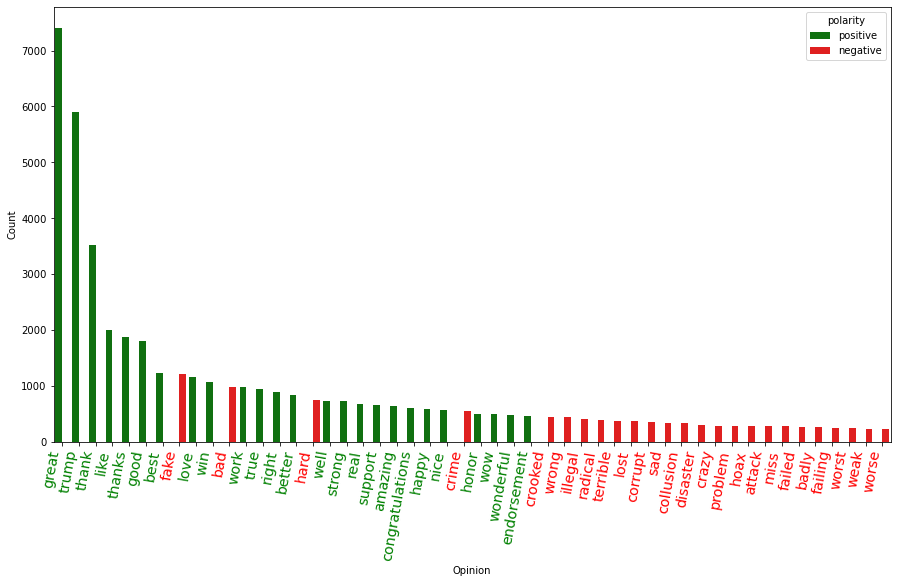

In [25]:
## Plot of top positives and negatives words in Donald Trump's tweets

plot_opinion(list_top_positives_opinion, list_top_negatives_opinion)

We can see that Donald Trump has used more positive words than negative words in general.


For positive words, **'great'** is the most frequently used as this word is one of his campaign slogan or his mantras. He always uses either **'thank'** ot **'thanks'** to show appreciation of his team or other political figures.  


For negative words, the usages of **'fake'** and **'bad'** are double that of other negative words. This could be the reason of numerous fake news of himeself and his team, and he stands out and points it out.

### Sentiment Score

As indicated above, the tweets of Donald Trump are **mainly positive** as the overall sentiment score is positive.

In [26]:
## Compute the global sentiment score

# sentiment score = count of positive words used - count of negative words used
sentiment_score = rdd_positive_words_tweets_count_kv.map(lambda tuple: tuple[1]).sum()\
                  - rdd_negative_words_tweets_count_kv.map(lambda tuple: tuple[1]).sum()

print('The sentiment score is : ',sentiment_score)

The sentiment score is :  28852


### Overall Analysis - Hot Topics

Generally, Donald Trump's tweets are about the following topics:

1) United States  
   -  General  
        - u.s
        - america
        - american
        - united
        - states
        - today - Report/ share the thing happened on that day
        - news  - Share the news/ breaking
        - people
        - national
        
        
   - 2016 Presidential Election  
        - vote
        - election
        - hillary - Hillary Clinton, democrat, candidate of 2016 Presidential Election
        - clinton - Same as above / the Clinton Family
        - campaign
        - america
        - state  - Probably about the campaign in a particular state, e.g. Iowa, Florida
        - 2016   - Election year
        - interview - Interviews with different media or interview somebody
        - history - Probably refer to make America great again in history
        - media - Could be the effect of media on the US Presidential election
        
        
   - 2020 Presidential Election
        - joe - Joe Biden , democrat, candidate of 2020 Presidential Election
        - biden - Same as above
    
    
   - Politics
        - president - Could be about himself or about the former President Obama
        - house     - Refering to White House
        - democrats - one of the two main political parties in U.S ( his opponents)
        - dems      - Same as above
        - republicans - one of the two main political parties in U.S (himself)
        - party       - Political parties
        - impeachment - The impeachment of Donald Trump in 2019 and 2020
        - joe - Joe Biden , member of the Democratic Party, the 47th vice president during the Obama administration from 2009 to 2017
        - biden
    
    
2) Economy  
   - jobs  
   - economy  
   - money  
    
    
3) International Politics  
   - border - The border of U.S and Mexico  
   - china - The trade war and relationship with China  
   - u.s  
   - military  - Military policy/ spending bill
   - deal - Deal with Middle East and other countries  
   - world  
    

In [29]:
## Read the stop words file

# We have added extra stop words, refer to the 'stop-words.txt'
rdd_stop_words = sc.textFile('stop-words.txt')

rdd_stop_words.take(5)

['a', 'about', 'above', 'across', 'after']

In [28]:
## Get the contextual words

# contextual words = all words in the tweets - positive words - negative words - stop words - references(@) - hashtags(#)
contextual_words = rdd_tweets_words_lower.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)\
                    .subtract(references).subtract(hashtags)
contextual_words.take(5)

['schools', 'schools', 'schools', 'schools', 'schools']

In [30]:
## Top 50 Hot Topics / Contextual Words

contextual_words_count_ordered = contextual_words.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

list_top_contextual_words = contextual_words_count_ordered.take(50)  

list_top_contextual_words

[('president', 4325),
 ('people', 3287),
 ('new', 2466),
 ('country', 2159),
 ('america', 2109),
 ('big', 2039),
 ('time', 1831),
 ('news', 1742),
 ('democrats', 1680),
 ('obama', 1621),
 ('vote', 1619),
 ('today', 1574),
 ('american', 1389),
 ('job', 1224),
 ('years', 1216),
 ('need', 1201),
 ('u.s', 1121),
 ('china', 1104),
 ('media', 1100),
 ('house', 1021),
 ('jobs', 997),
 ('border', 946),
 ('states', 941),
 ('state', 934),
 ('election', 916),
 ('deal', 909),
 ('biden', 900),
 ('world', 898),
 ('hillary', 887),
 ('united', 867),
 ('joe', 808),
 ('national', 776),
 ('republican', 751),
 ('military', 718),
 ('money', 698),
 ('year', 676),
 ('history', 671),
 ('campaign', 664),
 ('economy', 654),
 ('2016', 651),
 ('man', 632),
 ('help', 632),
 ('interview', 623),
 ('republicans', 614),
 ('dems', 609),
 ('record', 607),
 ('party', 600),
 ('stop', 598),
 ('impeachment', 596),
 ('clinton', 572)]

In [31]:
## Create a function for plotting a bar chart of the Top 50 Contextual Words

def plot_contextual_words(list_contextual_words):
    
    pd_df = pd.DataFrame({
        'Word':  [ t[0] for t in list_contextual_words ],
        'Count': [ t[1] for t in list_contextual_words ]
    }).sort_values('Count', ascending=False)
    
    plt.figure( figsize = (15, 8) )
    
    chart=sb.barplot(data=pd_df, x='Word', y='Count', order=pd_df['Word'], color='blue')
    
    chart.set_xticklabels(
        chart.get_xticklabels(), 
        rotation=80, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large',
        )
    
    plt.show()

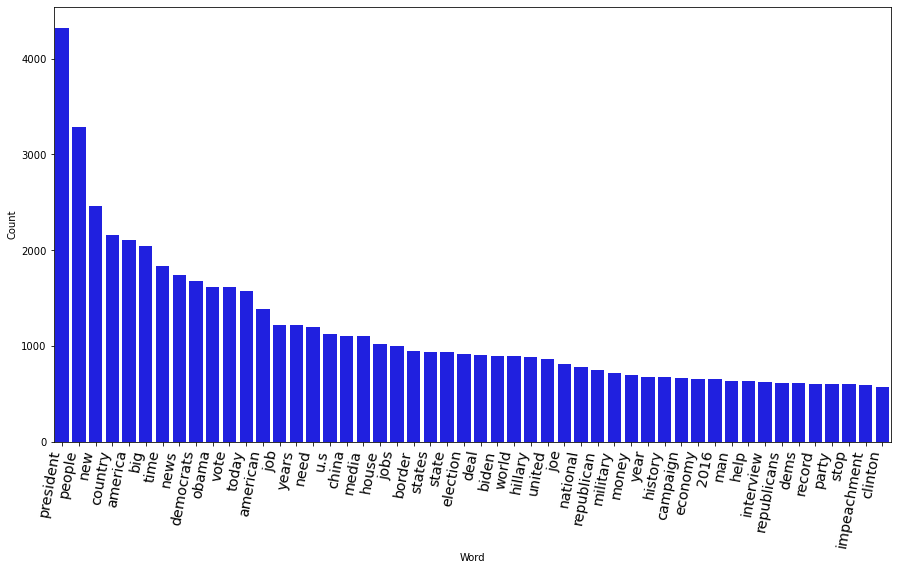

In [32]:
## Plot of Top 50 Contextual Words in Donald Trump's tweets

plot_contextual_words(list_top_contextual_words)

**'President'** is the most frequently used contextual word possibly because he uses 'President Trump' for every announment his makes.

# Comparison between original tweets and retweets



**Original tweets** are usually shared by Donald Trump compared to retweets. There are 48618 original tweets and 10063 retweets from 2009 to 2020. The number of original tweets are **4 times** of that of retweets. In this section, we will compare the sentiment analysis and hot topics between original tweets and retweets over years.

In [33]:
# Filter the Original tweets
rdd_original_tweets  = rdd_tweets.filter(lambda line: "RT" not in line)

# Filter the Retweets

rdd_retweets = rdd_tweets.filter(lambda line: "RT" in line)

In [34]:
# Number of original tweets

number_of_ot = rdd_original_tweets.count()
number_of_ot

48618

In [35]:
# Number of retweets

number_of_rt = rdd_retweets.count()
number_of_rt

10063

In [36]:
# The ratio of original tweet to retweet

import math

ratio_of_retweet = number_of_ot / number_of_rt
print (f'The ratio of original tweet to retweet is : {ratio_of_retweet}')
print (f'For every retweet , there are {math.trunc(ratio_of_retweet)} original tweets' )

The ratio of original tweet to retweet is : 4.831362416774322
For every retweet , there are 4 original tweets


## 3) Original Tweet Analysis

### Top 10 Hashtags (#) of Original tweets

The top 10 hashtags of Donald Trump's original tweets have **not much difference** from the top 10 hashtages of all the tweets, **except #VoteTrump** which he calls for votes.

The topics of the hashtags are about : 

##### 1) **2016 U.S. President Election** :   
- #Trump2016   
- #Trump2016https   
- #MAGA    
- #MakeAmericaGreatAgain     
- #AmericaFirst    
- #VoteTrump
     
     
##### 2) **Celebrity Apprentice** :  
an American television reality competition series hosted by Donald Trump before his presidency ( for 2008-2015)   

- #CelebApprentice  
- #CelebrityApprentice    


##### 3) Tile of his book ***Time to Get Tough: Making America #1 Again*** :   
- #TimeToGetTough    
- #1 


In [37]:
# Split each tweet into words
words_ot = rdd_original_tweets.flatMap(lambda word:re.split(',| |\[|\]|,|:|;|\.|\"', word.strip())).flatMap(lambda line: line.split(' '))

# Filter the words to get only hashtags, then map each hashtag to be a pair of (hashtag,1)
hashtags_ot = words_ot.filter(lambda w: '#' in w).map(lambda x: (x, 1))

## Top 10 Hashtags of Original tweets
hashtags_ot_count = hashtags_ot.reduceByKey(lambda x,y : x+y).sortBy(lambda tuple: tuple[1], ascending=False)
hashtags_ot_count.take(10)

[('#Trump2016', 681),
 ('#MakeAmericaGreatAgain', 378),
 ('#MAGA', 367),
 ('#CelebApprentice', 282),
 ('#CelebrityApprentice', 131),
 ('#1', 130),
 ('#TimeToGetTough', 95),
 ('#Trump2016https', 65),
 ('#VoteTrump', 64),
 ('#AmericaFirst', 64)]

### Top 10 References (@) of Original Tweets

The top 10 references of original tweets are more or less the same as the overal top 10 references.  
##### Added :   

- @MittRomney
- @nytimes  
    
    
##### Not on list for original tweets:  

- @WhiteHouse 
- @TeamTrump 
    
##### The references Donald Trump has been using can be categorized as :


##### 1) Himself, Republicans, his team  and political figures
- @realDonaldTrump 
- @IvankaTrump  
- @seanhannity 
- @BarackObama
- @MittRomney -  MittRomney, republican, junior United States senator from Utah since January 2019

##### 2) News source / Media  
- @FoxNews       - Conservative(Leans Right) News
- @foxandfriends - The weekday morning news show of Fox News Channel
- @CNN           - Liberal(Leans Left ) News
- @nytimes       - Liberal(Leans Left ) News
    
##### 3) TV Show
- @ApprenticeNBC - Celebrity Apprentice

In [38]:
# Filter the words to get only references, then map each reference to be a pair of (reference,1)
references_ot = words_ot.filter(lambda w: '@' in w).map(lambda x: (x, 1))

## Top 10 references of Original tweets
references_ot_count = references_ot.reduceByKey(lambda x,y : x+y).sortBy(lambda tuple: tuple[1], ascending=False)
references_ot_count.take(10)

[('@realDonaldTrump', 8104),
 ('@FoxNews', 785),
 ('@foxandfriends', 605),
 ('@BarackObama', 556),
 ('@ApprenticeNBC', 359),
 ('@CNN', 356),
 ('@MittRomney', 261),
 ('@seanhannity', 188),
 ('@nytimes', 181),
 ('@IvankaTrump', 154)]

### Sentiment Analysis of Original Tweets
#### Pre-processing the data

In [39]:
# Split the original tweets into a word list and filter the punctuation

rdd_original_tweets_words = rdd_original_tweets.flatMap(split_with_multiple_separator).filter(lambda word: word!='' and word!='”' and word!='.')

# Delete "https" contents of the original tweets

rdd_original_tweets_words = rdd_original_tweets_words.filter(lambda line: delhttps(line) != 1)

# Transform all the words into lowercase
rdd_original_tweets_words_lower = rdd_original_tweets_words.flatMap(lambda word:word.lower().split())
rdd_original_tweets_words_lower.take(10)

['republicans',
 'and',
 'democrats',
 'have',
 'both',
 'created',
 'our',
 'economic',
 'problems',
 '02/08/2011']

In [40]:
# Initialize an rdd with key/value for counting each word in the original tweets 

rdd_original_tweets_words_kv = rdd_original_tweets_words_lower.map(lambda word: (word, 1))

rdd_original_tweets_words_kv.take(10)

[('republicans', 1),
 ('and', 1),
 ('democrats', 1),
 ('have', 1),
 ('both', 1),
 ('created', 1),
 ('our', 1),
 ('economic', 1),
 ('problems', 1),
 ('02/08/2011', 1)]

### Top Positive Words of Original Tweets


In [41]:
## Join the cleaned word list with the positive word list
# Use the mapValues transformation to assign a default count of 1 for each positive word

rdd_positive_words_ot_kv = rdd_original_tweets_words_kv.join(rdd_positive_words_kv).mapValues(lambda tuple: 1)

## Count the number of occurences of each positive word in original tweets

rdd_positive_words_ot_count_kv = rdd_positive_words_ot_kv.reduceByKey(lambda x,y : x+y)

rdd_positive_words_ot_count_kv.take(5)

[('thrilled', 46),
 ('wonderful', 462),
 ('sustainable', 3),
 ('best', 1129),
 ('like', 1808)]

In [42]:
## Top 25 positive words of original tweets

rdd_positive_words_ot_count_kv_ordered = rdd_positive_words_ot_count_kv.sortBy(lambda tuple: tuple[1], ascending=False)

list_top_positives_opinion_ot = rdd_positive_words_ot_count_kv_ordered.take(25)

list_top_positives_opinion_ot

[('great', 6998),
 ('trump', 4868),
 ('thank', 3237),
 ('like', 1808),
 ('thanks', 1798),
 ('good', 1693),
 ('best', 1129),
 ('love', 1066),
 ('win', 980),
 ('true', 888),
 ('work', 869),
 ('better', 777),
 ('right', 765),
 ('well', 679),
 ('strong', 641),
 ('real', 598),
 ('amazing', 589),
 ('nice', 550),
 ('congratulations', 549),
 ('happy', 512),
 ('support', 505),
 ('wonderful', 462),
 ('wow', 450),
 ('endorsement', 442),
 ('honor', 436)]

### Top Negative Words of Original Tweets


In [43]:
## Join the cleaned word list with the negative word list
# Use the mapValues transformation to assign a default count of 1 for each negative word

rdd_negative_words_ot_kv = rdd_original_tweets_words_kv.join(rdd_negative_words_kv).mapValues(lambda tuple:1)

## Count the number of occurences of each negative word in tweets

rdd_negative_words_ot_count_kv = rdd_negative_words_ot_kv.reduceByKey(lambda x,y: x+y)

rdd_negative_words_ot_count_kv.take(5)

[('threat', 64),
 ('disaster', 279),
 ('fraud', 150),
 ('worse', 212),
 ('dishonest', 197)]

In [44]:
## Top 25 negative words of original tweets
rdd_negative_words_ot_count_kv_ordered = rdd_negative_words_ot_count_kv.sortBy(lambda tuple: tuple[1], ascending=False)

list_top_negatives_opinion_ot = rdd_negative_words_ot_count_kv_ordered.take(25)

list_top_negatives_opinion_ot

[('fake', 1118),
 ('bad', 942),
 ('hard', 685),
 ('crime', 491),
 ('crooked', 430),
 ('wrong', 393),
 ('illegal', 365),
 ('terrible', 356),
 ('lost', 328),
 ('radical', 320),
 ('corrupt', 315),
 ('sad', 312),
 ('disaster', 279),
 ('collusion', 268),
 ('miss', 262),
 ('crazy', 261),
 ('problem', 260),
 ('failing', 246),
 ('badly', 244),
 ('hoax', 236),
 ('worst', 232),
 ('attack', 232),
 ('failed', 231),
 ('weak', 221),
 ('phony', 213)]

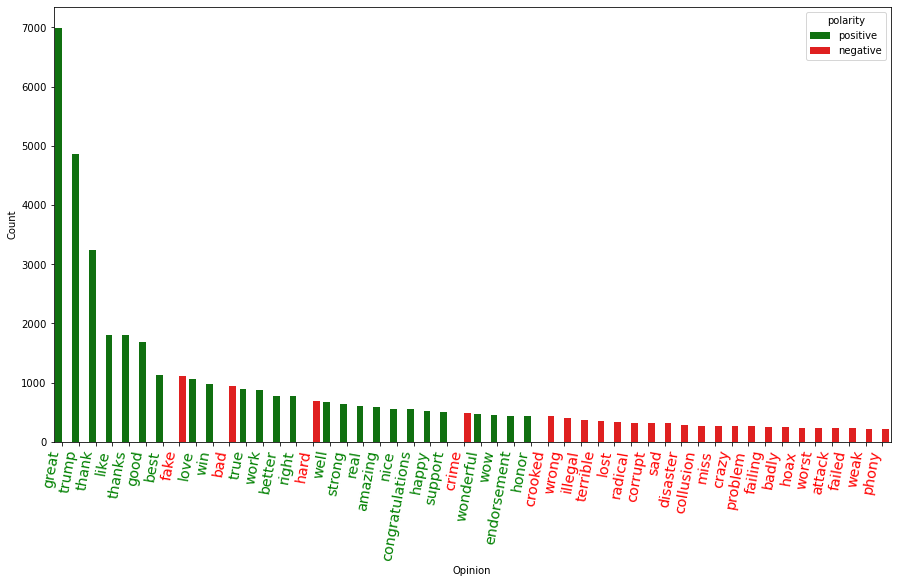

In [45]:
## Plot of top positives and negatives words in Donald Trump's original tweets

plot_opinion(list_top_positives_opinion_ot, list_top_negatives_opinion_ot)

The distribution of top positive and negative words in original tweets is similar to that of all the tweets. **'Great'** and **'fake'** are still the most frequently used positive and negative words respectively.

### Sentiment Score

As indicated above, the tweets of Donald Trump are **mainly positive** as the overall sentiment score is positive.

In [46]:
## Compute the global sentiment score

# sentiment score = count of positive words used - count of negative words used
sentiment_score_ot = rdd_positive_words_ot_count_kv.map(lambda tuple: tuple[1]).sum()\
                  - rdd_negative_words_ot_count_kv.map(lambda tuple: tuple[1]).sum()

print('The sentiment score is : ',sentiment_score_ot)

The sentiment score is :  26780


### Hot Topics of Original Tweets
The hot topics of Donald Trump's original tweets more or less the same as those of all tweets which are about the following topics:

1) United States  
   -  General  
        - u.s
        - america
        - american
        - united
        - states
        - today - Report/ share the thing happened on that day
        - news  - Share the news/ breaking
        - people
        - national
        
        
   - 2016 Presidential Election  
        - vote
        - election
        - hillary - Hillary Clinton, democrat, candidate of 2016 Presidential Election
        - clinton - Same as above / the Clinton Family
        - campaign
        - america
        - state  - Probably about the campaign in a particular state, e.g. Iowa, Florida
        - 2016   - Election year
        - interview - Interviews with different media or interview somebody
        - history - Probably refer to make America great again in history
        - media - Could be the effect of media on the US Presidential election
        
        
   - 2020 Presidential Election
        - joe - Joe Biden , democrat, candidate of 2020 Presidential Election
        - biden - Same as above
        - vote
        - election
    
    
   - Politics
        - president - Could be about himself or about the former President Obama
        - house     - Refering to White House
        - democrats - one of the two main political parties in U.S ( his opponents)
        - dems      - Same as above
        - republicans - one of the two main political parties in U.S (himself)
        - party       - Political parties
        - impeachment - The impeachment of Donald Trump in 2019 and 2020
        - joe - Joe Biden , member of the Democratic Party, the 47th vice president during the Obama administration from 2009 to 2017
        - biden  - same as above
    
    
2) Economy  
   - jobs  
   - economy  
   - money
   - business
    
    
3) International Politics  
   - border - The border of U.S and Mexico  
   - china - The trade war and relationship with China  
   - u.s  
   - military  - Military policy/ spending bill
   - deal - Deal with Middle East and other countries  
   - world  
    

In [48]:
## Get the contextual words

contextual_words_ot = rdd_original_tweets_words_lower.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)\
                        .subtract(references).subtract(hashtags)


In [49]:
## Top 50 Contextual Words/ Hot Topics

contextual_words_count_ordered_ot = contextual_words_ot.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

list_top_contextual_words_ot = contextual_words_count_ordered_ot.take(50)  

list_top_contextual_words_ot

[('people', 2903),
 ('president', 2871),
 ('new', 2081),
 ('country', 1984),
 ('big', 1899),
 ('america', 1813),
 ('time', 1625),
 ('news', 1484),
 ('obama', 1455),
 ('vote', 1421),
 ('today', 1208),
 ('democrats', 1192),
 ('job', 1136),
 ('need', 1080),
 ('years', 1031),
 ('china', 1022),
 ('american', 997),
 ('u.s', 975),
 ('media', 868),
 ('jobs', 868),
 ('hillary', 838),
 ('border', 831),
 ('world', 828),
 ('deal', 823),
 ('states', 799),
 ('state', 779),
 ('house', 764),
 ('election', 741),
 ('united', 735),
 ('military', 653),
 ('money', 651),
 ('republican', 629),
 ('national', 629),
 ('year', 608),
 ('man', 584),
 ('2016', 571),
 ('history', 563),
 ('interview', 557),
 ('campaign', 548),
 ('stop', 530),
 ('business', 526),
 ('record', 524),
 ('joe', 524),
 ('republicans', 521),
 ('economy', 520),
 ('hope', 512),
 ('clinton', 507),
 ('help', 507),
 ('biden', 506),
 ('trade', 498)]

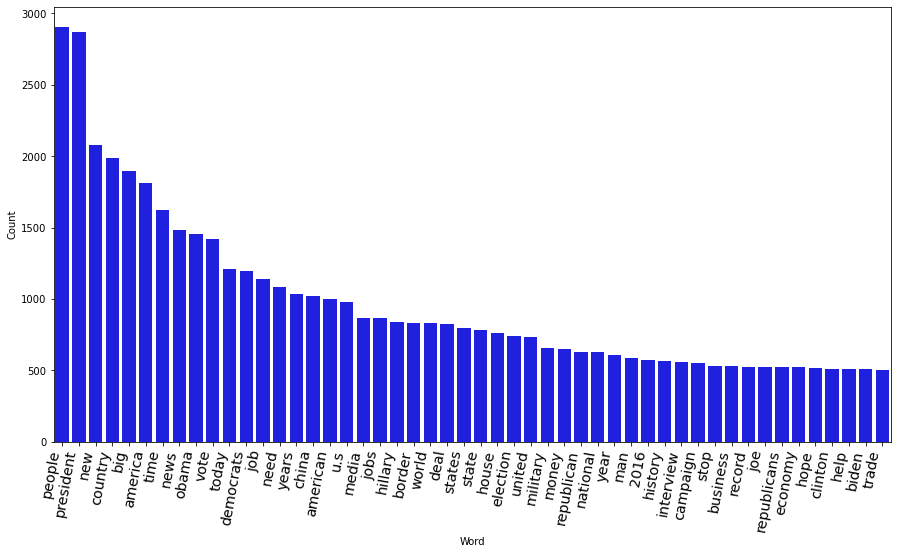

In [50]:
## Plot of Top 50 Contextual Words in Donald Trump's original tweets

plot_contextual_words(list_top_contextual_words_ot)

## 4) Retweet Analysis

### Top 10 Hashtags (#) of Retweets

The top 10 hashtags of Donald Trump's retweets are different from the top 10 hashtages of his original tweets as most of the hashtags of retweets are related to **current affairs (including COVID-19)** instead of his presidential election.

The topics of the hashtags are about : 

##### 1) **2016 U.S. President Election** :   
- #Trump2016    
- #MAGA    
         
     
##### 2) **COVID-19** :  
- #COVID19  
- #coronavirus 
- **#PaycheckProtectionProgram** - The Paycheck Protection Program is one of two programs designed to help small businesses during the coronavirus crisis in 2020


##### 3) Current Affairs in U.S : 

- **#Dorian**  -  Hurricane Dorian impacts the East Coast of U.S in 2019
- **#Florence** - Hurricane Florence causes catastrophic damage in the Carolinas in September 2018
- #BREAKING - Sharing of breaking news 
- #USMCA - United States-Mexico-Canada Agreement (North American Free Trade Agreement) signed in 2018 and 2019
- #impeachment - The impeachment of Donald Trump in 2019 and 2020
     


In [51]:
# Split each tweet into words
words_rt = rdd_retweets.flatMap(lambda word:re.split(',| |\[|\]|,|:|;|\.|\"', word.strip())).flatMap(lambda line: line.split(" "))

# Filter the words to get only hashtags, then map each hashtag to be a pair of (hashtag,1)
hashtags_rt = words_rt.filter(lambda w: '#' in w).map(lambda x: (x, 1))

## Top 10 Hashtags of Retweets
hashtags_rt_count = hashtags_rt.reduceByKey(lambda x,y : x+y).sortBy(lambda tuple: tuple[1], ascending=False)
hashtags_rt_count.take(10)

[('#MAGA', 69),
 ('#COVID19', 60),
 ('#USMCA', 32),
 ('#Dorian', 29),
 ('#coronavirus', 27),
 ('#PaycheckProtectionProgram', 21),
 ('#impeachment', 17),
 ('#BREAKING', 15),
 ('#Florence', 15),
 ('#Trump2016', 14)]

### Top 10 References (@) of Retweets

The top 10 references of retweets are **Republican** or **government officials** or **his relatives** whereas his original tweet references are more diversified.  


- @realDonaldTrump 
- @WhiteHouse - The offical Twitter account of President Trump  
- @TeamTrump - The official Twitter account for the Trump Campaign (both 2016 and 2020) 
- @POTUS - President of the United States, an official US government twittwer account of President
- @Jim_Jordan - Jim Jordan, U.S. representative for Ohio's 4th congressional district since 2007
- @DanScavino - Dan Scavino, White House Deputy Chief of Staff
- @GOPChairwoman - Ronna McDaniel, Chair of the Republican National Committee since 2017
- @GOP - Republican Party
- @DonaldJTrumpJr - Donald Trump Jr., a trustee and executive vice president of the Trump Organization
- @dbongino - Conservative political commentator, radio show host, author, politician


In [52]:
# Filter the words to get only references, then map each reference to be a pair of (reference,1)
references_rt = words_rt.filter(lambda w: '@' in w).map(lambda x: (x, 1))

### Top 10 references of Retweets

references_rt_count = references_rt.reduceByKey(lambda x,y : x+y).sortBy(lambda tuple: tuple[1], ascending=False)
references_rt_count.take(10)


[('@realDonaldTrump', 2382),
 ('@WhiteHouse', 694),
 ('@TeamTrump', 286),
 ('@GOPChairwoman', 217),
 ('@DanScavino', 168),
 ('@Jim_Jordan', 161),
 ('@POTUS', 150),
 ('@GOP', 148),
 ('@DonaldJTrumpJr', 137),
 ('@dbongino', 134)]

### Sentiment Analysis of Retweets
#### Pre-processing the data

In [53]:
# Split the retweets into a word list and filter the punctuation

rdd_retweets_words = rdd_retweets.flatMap(split_with_multiple_separator).filter(lambda word: word!='' and word!='”' and word!='.')

# Delete "https" contents of the retweets

rdd_retweets_words = rdd_retweets_words.filter(lambda line: delhttps(line) != 1)

# Transform all the words into lowercase

rdd_retweets_words_lower = rdd_retweets_words.flatMap(lambda word:word.lower().split())
rdd_retweets_words_lower.take(50)

['rt',
 '@cbs_herridge',
 'read',
 'letter',
 'to',
 'surveillance',
 'court',
 'obtained',
 'by',
 'cbs',
 'news',
 'questions',
 'where',
 'there',
 'will',
 'be',
 'further',
 'disciplinary',
 'action',
 'and',
 'cho…',
 '17/01/2020',
 '03:22:47',
 'rt',
 '@mzhemingway',
 'very',
 'friendly',
 'telling',
 'of',
 'events',
 'here',
 'about',
 "comey's",
 'apparent',
 'leaking',
 'to',
 'compliant',
 'media',
 'if',
 'you',
 'read',
 'those',
 'articles',
 'and',
 'tho…',
 '17/01/2020',
 '13:13:59',
 'rt',
 '@whitehouse',
 'president']

In [54]:
# initialize an rdd with key/value for counting each word in the retweets 

rdd_retweets_words_kv = rdd_retweets_words_lower.map(lambda word: (word, 1))

rdd_retweets_words_kv.take(10)

[('rt', 1),
 ('@cbs_herridge', 1),
 ('read', 1),
 ('letter', 1),
 ('to', 1),
 ('surveillance', 1),
 ('court', 1),
 ('obtained', 1),
 ('by', 1),
 ('cbs', 1)]

### Top Positive Words of Retweets

The top 25 positive words of retweets are mostly the same as original tweets. Except the following:  


**'Support'** is used more frequently in retweets than in original tweets.  
**'Wow'** and **'endorsement'** are on the list for original tweets but **not** on the list for retweets.  
**'Incredible'** is **not** on the list for original tweets but on the list for retweets.

In short, frequent **appreciation** to others can be seen in his retweets.

In [55]:
## Join the cleaned word list with the positive word list
# Use the mapValues transformation to assign a default count of 1 for each positive word

rdd_positive_words_rt_kv = rdd_retweets_words_kv.join(rdd_positive_words_kv).mapValues(lambda tuple: 1)

## Count the number of occurences of each positive word in retweets

rdd_positive_words_rt_count_kv = rdd_positive_words_rt_kv.reduceByKey(lambda x,y : x+y)

rdd_positive_words_rt_count_kv.take(5)

[('right', 132), ('good', 117), ('like', 184), ('safe', 38), ('effective', 12)]

In [56]:
## Top 25 positive words of retweets

rdd_positive_words_rt_count_kv_ordered = rdd_positive_words_rt_count_kv.sortBy(lambda tuple: tuple[1], ascending=False)

list_top_positives_opinion_rt = rdd_positive_words_rt_count_kv_ordered.take(25)

list_top_positives_opinion_rt

[('trump', 1030),
 ('great', 415),
 ('thank', 279),
 ('like', 184),
 ('support', 156),
 ('right', 132),
 ('good', 117),
 ('work', 114),
 ('best', 107),
 ('win', 91),
 ('love', 85),
 ('strong', 84),
 ('thanks', 77),
 ('real', 74),
 ('incredible', 74),
 ('protect', 70),
 ('happy', 67),
 ('proud', 67),
 ('important', 65),
 ('approval', 64),
 ('honor', 63),
 ('better', 63),
 ('clear', 62),
 ('true', 55),
 ('well', 54)]

### Top Negative Words of Retweets

Interestingly, the top negative words show the differences between original tweets and retweets.  

The top negative words for retweets seem to be more about refuting the accuses, for example, **'collusion'** ,**'impeach'**, **'sham'**, **'crisis'**, **'lies'**, **'corrupt'** whereas original tweets have no particular pattern of the negative words.

In [57]:
## Join the cleaned word list with the negative word list
# Use the mapValues transformation to assign a default count of 1 for each negative word

rdd_negative_words_rt_kv = rdd_retweets_words_kv.join(rdd_negative_words_kv).mapValues(lambda tuple:1)

## Count the number of occurences of each negative word in retweets

rdd_negative_words_rt_count_kv = rdd_negative_words_rt_kv.reduceByKey(lambda x,y: x+y)

rdd_negative_words_rt_count_kv.take(5)

[('dishonest', 8),
 ('lost', 35),
 ('fraud', 46),
 ('killed', 31),
 ('epidemic', 7)]

In [58]:
## Top 25 negative words of retweets

rdd_negative_words_rt_count_kv_ordered = rdd_negative_words_rt_count_kv.sortBy(lambda tuple: tuple[1], ascending=False)

list_top_negatives_opinion_rt = rdd_negative_words_rt_count_kv_ordered.take(25)

list_top_negatives_opinion_rt

[('breaking', 138),
 ('fake', 92),
 ('radical', 65),
 ('collusion', 62),
 ('hard', 61),
 ('impeach', 51),
 ('sham', 50),
 ('crime', 50),
 ('illegal', 49),
 ('crisis', 48),
 ('hoax', 47),
 ('fraud', 46),
 ('abuse', 46),
 ('partisan', 46),
 ('critical', 46),
 ('bad', 45),
 ('attack', 44),
 ('wrong', 42),
 ('lies', 40),
 ('destroy', 38),
 ('false', 36),
 ('corrupt', 36),
 ('failed', 36),
 ('lost', 35),
 ('corruption', 33)]

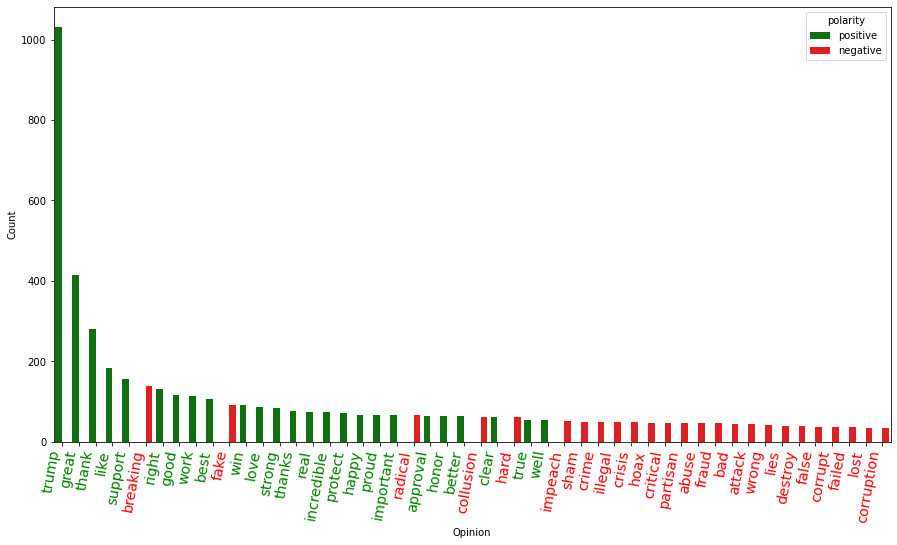

In [59]:
## Plot of top positives and negatives words in Donald Trump's retweets

plot_opinion(list_top_positives_opinion_rt, list_top_negatives_opinion_rt)

**'Support'** and **'breaking'** come to the front of the list for retweets while the overall distribution of positive and negative words have no much difference from original tweets.   


### Sentiment Score
As indicated above, the retweets of Donald Trump are mainly positive as the overall sentiment score is positive.

In [60]:
## Compute the global sentiment score

# sentiment score = count of positive words used - count of negative words used
sentiment_score_rt = rdd_positive_words_rt_count_kv.map(lambda tuple: tuple[1]).sum()\
                  - rdd_negative_words_rt_count_kv.map(lambda tuple: tuple[1]).sum()

print('The sentiment score is : ',sentiment_score_rt)

The sentiment score is :  2072


### Hot Topics of Retweets
The hot topics of Donald Trump's retweets more or less the same as those of all tweets but cover **extra topics**( topics in **bold**) which are usually **current affairs** and **politics**.

1) United States  
   -  General  
        - u.s
        - america
        - american
        - united
        - states
        - today - Report/ share the thing happened on that day
        - news  - Share the news/ breaking
        - people
        - national
        
        
   - 2016 Presidential Election  
        - vote
        - election
        - hillary - Hillary Clinton, democrat, candidate of 2016 Presidential Election
        - clinton - Same as above / the Clinton Family
        - campaign
        - america
        - state  - Probably about the campaign in a particular state, e.g. Iowa, Florida
        - 2016   - Election year
        - interview - Interviews with different media or interview somebody
        - history - Probably refer to make America great again in history
        - media - Could be the effect of media on the US Presidential election
        
        
   - 2020 Presidential Election
        - joe - Joe Biden , democrat, candidate of 2020 Presidential Election
        - biden - Same as above
        - vote
        - election
    
    
   - Politics
        - president - Could be about himself or about the former President Obama
        - house     - Refering to White House
        - democrats - one of the two main political parties in U.S ( his opponents)
        - dems      - Same as above
        - republicans - one of the two main political parties in U.S (himself)
        - party       - Political parties
        - impeachment - The impeachment of Donald Trump in 2019 and 2020
        - joe - Joe Biden , member of the Democratic Party, the 47th vice president during the Obama administration from 2009 to 2017
        - biden - same as above
        - **senate** - The United States Senate, the upper chamber of the United States Congress
        - **congress** - the United States Congress
        - **pelosi** - Nancy Pelosi, Speaker of the United States House of Representatives since 2019
        - **adam** - Adam Schiff, U.S. Representative for California's 28th congressional district since 2013
        - **schiff** - Same as above 
        
        
   - Current Affairs  
        - **coronavirus**
        - **05/06/2020** - Probably about the announcement of surprising job gains during the pandemic
        - **fbi** - The Federal Bureau of Investigation
        - **court** - Probably about his lawsuits about his business failures, successes, and personality,etc.
        - **law**
    
2) Economy  
   - jobs  
   - economy  
   - money
   - business
    
    
3) International Politics  
   - border - The border of U.S and Mexico  
   - china - The trade war and relationship with China  
   - u.s  
   - military  - Military policy/ spending bill
   - deal - Deal with Middle East and other countries  
   - world  
    

In [61]:
## Get the contextual words

contextual_words_rt = rdd_retweets_words_lower.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)\
                        .subtract(references.map(lambda word:word.lower())).subtract(hashtags)


In [62]:
## Top 50 Contextual Words/ Hot Topics

contextual_words_count_ordered_rt = contextual_words_rt.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

list_top_contextual_words_rt = contextual_words_count_ordered_rt.take(50)  

list_top_contextual_words_rt

[('president', 1454),
 ('democrats', 488),
 ('biden', 394),
 ('american', 392),
 ('new', 385),
 ('people', 384),
 ('today', 366),
 ('impeachment', 328),
 ('america', 296),
 ('joe', 284),
 ('news', 258),
 ('house', 257),
 ('media', 232),
 ('senate', 215),
 ('time', 206),
 ('vote', 198),
 ('live', 191),
 ('years', 185),
 ('fbi', 180),
 ('election', 175),
 ('country', 175),
 ('americans', 170),
 ('obama', 166),
 ('coronavirus', 160),
 ('schiff', 160),
 ('state', 155),
 ('national', 147),
 ('u.s', 146),
 ('states', 142),
 ('big', 140),
 ('economy', 134),
 ('united', 132),
 ('jobs', 129),
 ('help', 125),
 ('pelosi', 123),
 ('report', 123),
 ('republican', 122),
 ('need', 121),
 ('dems', 117),
 ('court', 117),
 ('campaign', 116),
 ('border', 115),
 ('party', 110),
 ('congress', 109),
 ('history', 108),
 ('democrat', 108),
 ('law', 108),
 ('05/06/2020', 103),
 ('million', 101),
 ('adam', 101)]

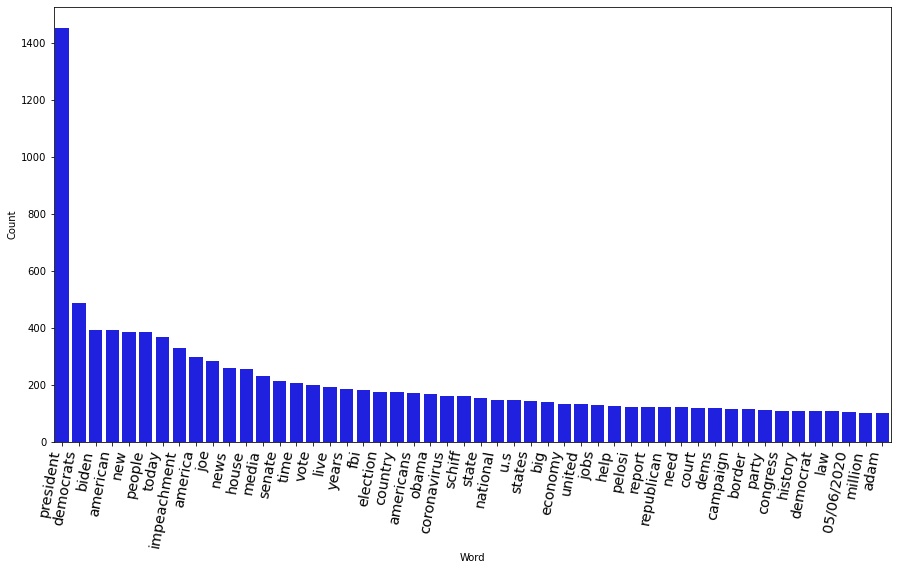

In [63]:
## Plot of Top 50 Contextual Words in Donald Trump's tweets

plot_contextual_words(list_top_contextual_words_rt)

The usage of **'president'** is almost five times of that of other contextual words, followed by **'democrats'** and **'Biden'** which could be the opinions to his opponents.

# 5) Anaylsis of Tweet per year

In this section, we will focus on the contextual words/ hot topics of Donald Trump's tweets only.


### The number of Donald Trump's tweets in each year from 2009- 2020
We can see that Donald Trump was not very active in early years until 2012. Therefore, our analysis will focus on the tweets after 2012.

There are over **11 thousands of tweets** in **2020**, **triple** of the amount of tweets in 2012. His uses of Twitters has been increasing even though there are fluctuations between 2012 and 2020.

In [64]:
for y in range(2009,2021):
    year = '/' + str(y)
    print ('The number of tweets in ', y , ' : ' , rdd_tweets.filter(lambda line : re.search(year,line)).count())

The number of tweets in  2009  :  56
The number of tweets in  2010  :  142
The number of tweets in  2011  :  773
The number of tweets in  2012  :  3531
The number of tweets in  2013  :  8144
The number of tweets in  2014  :  5784
The number of tweets in  2015  :  7536
The number of tweets in  2016  :  4228
The number of tweets in  2017  :  2604
The number of tweets in  2018  :  3569
The number of tweets in  2019  :  7818
The number of tweets in  2020  :  11337


### 2012 - Hot Topics

In 2012, the tweets of Donald Trump are mostly about economy and Former President Obama's policies:


1) Economy :  

   - jobs  
   - money  
   - economy  
   - unemployment  
   - gas  
   - oil  
    
    
2) Obama's Policies :  

   - president  
   - obama  
   - obama's  
   - tax  
   - obamacare  
   - government  


3) Politics :

   - election - Probably refer to 2012 Presidential Election  
   - chinese  
   - discussing  
   - gas  
   - oil      
   - debate  
   - interview  

In [65]:
# Split the original tweets into a word list and filter the punctuation
rdd_tweets_2012 = rdd_tweets.filter(lambda line : re.search('/2012',line))\
                    .flatMap(split_with_multiple_separator).filter(lambda word: word!='' and word!='”' and word!='.')\
                    .filter(lambda line: delhttps(line) != 1).flatMap(lambda word:word.lower().split())

## Get the contextual words
contextual_words_2012 = rdd_tweets_2012.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)\
                    .subtract(references).subtract(hashtags)


In [66]:
## Top 50 Contextual Words/ Hot Topics of 2012

contextual_words_2012_ordered = contextual_words_2012.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

contextual_words_2012_ordered.take(50)  


[('obama', 345),
 ('china', 167),
 ('interview', 130),
 ('people', 121),
 ('new', 117),
 ('time', 116),
 ('discussing', 103),
 ('president', 97),
 ('america', 86),
 ('country', 76),
 ('deal', 76),
 ('job', 75),
 ('big', 74),
 ('record', 68),
 ('election', 68),
 ('jobs', 67),
 ("obama's", 65),
 ('need', 63),
 ('17/10/2012', 63),
 ('money', 62),
 ('world', 61),
 ('years', 60),
 ('gas', 60),
 ('today', 56),
 ('season', 55),
 ('06/12/2012', 53),
 ('year', 53),
 ('tax', 52),
 ('million', 52),
 ('26/10/2012', 51),
 ('national', 51),
 ('american', 50),
 ('economy', 49),
 ('obamacare', 49),
 ('golf', 48),
 ('debate', 47),
 ('convention', 47),
 ("doesn't", 46),
 ('campaign', 45),
 ('oil', 45),
 ('19/10/2012', 45),
 ('2012', 44),
 ('yesterday', 44),
 ('hope', 43),
 ('unemployment', 43),
 ('wants', 43),
 ('stop', 43),
 ('chinese', 43),
 ('records', 43),
 ('government', 42)]

### 2013 - Hot Topics
In 2013, the hot topics are similar to the previous year except he alos tweets about his personal life/ leisure this year. The hot topics of 2013 can be categorized as 3 areas :

1) Politics :
- obama
- president
- obamacare
- world
- country
- china
- deal 
- scotland
- u.s
- syria
- ties

2) Economy : 
- money
- business


3) Entertainments/Leisure/Personal business :
- golf
- apprentice - His TV shows
- celebrity - His TV shows
- life
- birthday
- hotel - His hotel (Trump International Hotel)
- doral - Trump attended World Golf Championship Cadillac Championship in Doral, Florida

In [67]:
# Split the original tweets into a word list and filter the punctuation
rdd_tweets_2013 = rdd_tweets.filter(lambda line : re.search('/2013',line))\
                    .flatMap(split_with_multiple_separator).filter(lambda word: word!='' and word!='”' and word!='.')\
                    .filter(lambda line: delhttps(line) != 1).flatMap(lambda word:word.lower().split())

## Get the contextual words
contextual_words_2013 = rdd_tweets_2013.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)\
                    .subtract(references).subtract(hashtags)

In [68]:
## Top 50 Contextual Words/ Hot Topics of 2013


contextual_words_2013_ordered = contextual_words_2013.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

contextual_words_2013_ordered.take(50)  

[('people', 329),
 ('obama', 291),
 ('president', 271),
 ('time', 255),
 ('big', 241),
 ('new', 240),
 ('country', 193),
 ('obamacare', 162),
 ('job', 137),
 ('need', 133),
 ('golf', 126),
 ('apprentice', 119),
 ('course', 119),
 ('money', 117),
 ('yes', 115),
 ('world', 115),
 ('thanks.', 113),
 ('man', 111),
 ('business', 107),
 ('today', 107),
 ('deal', 104),
 ('hope', 103),
 ('china', 103),
 ('27/02/2013', 100),
 ('celebrity', 99),
 ('24/07/2013', 95),
 ('2016', 92),
 ('years', 90),
 ('america', 86),
 ('interview', 86),
 ('28/03/2013', 84),
 ('19/03/2013', 82),
 ('needs', 81),
 ('wind', 79),
 ('ties', 77),
 ('scotland', 77),
 ('u.s', 75),
 ('year', 73),
 ('national', 71),
 ('hotel', 69),
 ('agree', 69),
 ('syria', 69),
 ('24/04/2013', 68),
 ('doral', 68),
 ('24/05/2013', 68),
 ('life', 67),
 ('18/10/2013', 67),
 ('birthday', 67),
 ('sure', 66),
 ('13/02/2013', 65)]

### 2014 - Hot Topics

In 2014, Donald Trump has more focuses on politics and disputes around him rather than economy. The hot topics can be categorized as 3 areas : 

1) Politics/ Current Affairs :
- obama
- president
- obamacare
- world
- country
- china
- deal 
- scotland
- u.s
- iraq
- ties
- needs
- **leader**
- **ebola** -  Public Health Emergency of International Concern was declared on Ebola in 2014
- **Disputes** :
    - **entrepreneurs** - Court case : People v Trump **Entrepreneur** Initiative LLC
    - **chicago** - a war of words between Trump and Chicago Mayor Rahm Emanuel for the letter sign on Donald Trump's skyscraper in Chicago
    - **sign** - Same as above
    - **building** - Same as above

- **2016 Presidential Election** :
	- 2016
	- vote
    
    
2) Economy : 
- business


3) Entertainments/Leisure/Personal Business :
- apprentice - His TV shows
- celebrity - His TV shows
- art
- golf
- hotel - His hotel (Trump International Hotel)


In [69]:
# Split the original tweets into a word list and filter the punctuation
rdd_tweets_2014 = rdd_tweets.filter(lambda line : re.search('/2014',line))\
                    .flatMap(split_with_multiple_separator).filter(lambda word: word!='' and word!='”' and word!='.')\
                    .filter(lambda line: delhttps(line) != 1).flatMap(lambda word:word.lower().split())

## Get the contextual words
contextual_words_2014 = rdd_tweets_2014.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)\
                    .subtract(references).subtract(hashtags)


In [70]:
## Top 50 Contextual Words/ Hot Topics of 2014

contextual_words_2014_ordered = contextual_words_2014.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

contextual_words_2014_ordered.take(50)  

[('president', 585),
 ('obama', 304),
 ('country', 226),
 ('need', 218),
 ('new', 212),
 ('vote', 195),
 ('people', 187),
 ('thanks.', 168),
 ('course', 163),
 ('golf', 160),
 ('2016', 160),
 ('time', 153),
 ('man', 141),
 ('world', 127),
 ('america', 123),
 ('business', 122),
 ('big', 122),
 ('needs', 112),
 ('hotel', 102),
 ('today', 91),
 ('agree', 91),
 ('u.s', 90),
 ('job', 89),
 ('ebola', 89),
 ('deal', 89),
 ('17/06/2014', 88),
 ('sign', 85),
 ('obamacare', 85),
 ('hope', 82),
 ('leader', 82),
 ('chicago', 80),
 ('entrepreneurs', 79),
 ('apprentice', 75),
 ('wait', 74),
 ('stop', 73),
 ('looks', 73),
 ('years', 72),
 ('building', 66),
 ('interview', 64),
 ('office', 62),
 ('03/12/2014', 62),
 ('year', 61),
 ('american', 61),
 ('15/06/2014', 58),
 ('stay', 58),
 ('scotland', 57),
 ('art', 57),
 ('place', 56),
 ('03/03/2014', 54),
 ('iraq', 54)]

### 2015 - Hot Topics



In 2015, Donald Trump has more focuses on 2016 Presidential Election and disputes around him. There are almost no personal life and economy topics. The hot topics can be categorized as 3 areas : 

1) Politics/ Current Affairs :
- obama
- president
- obamacare
- world
- country
- deal 
- u.s
- gop - Republican Party
- needs

- **Disputes** :
    - **entrepreneurs** - Court case : People v Trump **Entrepreneur** Initiative LLC
    - **truth**


- **2016 Presidential Election** :
	- 2016
	- vote
	- poll
	- **polls**
	- **live**
	- talk
	- **speech**
	- debate
	- interview
	- **hillary**
	- donaldtrump
	- **jeb**	- Jeb Bush, a Republican nominee for 2016 Presidential Election, he has dedates with Donald Trump
	- **bush**	- Same as above
	- **candidate** 
	- iowa  - Probably the campaign rally in Iowa
	- **crowd** - supporters of Donald Trump in the campaign rally    - 
    
2) Economy : 
- business
- money


3) Entertainments/Leisure :
- apprentice - His TV shows


In [71]:
# Split the original tweets into a word list and filter the punctuation
rdd_tweets_2015 = rdd_tweets.filter(lambda line : re.search('/2015',line))\
                    .flatMap(split_with_multiple_separator).filter(lambda word: word!='' and word!='”' and word!='.')\
                    .filter(lambda line: delhttps(line) != 1).flatMap(lambda word:word.lower().split())

## Get the contextual words
contextual_words_2015 = rdd_tweets_2015.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)\
                    .subtract(references).subtract(hashtags)


In [72]:
## Top 50 Contextual Words/ Hot Topics of 2015

contextual_words_2015_ordered = contextual_words_2015.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

contextual_words_2015_ordered.take(50)  

[('president', 514),
 ('america', 478),
 ('people', 318),
 ('need', 290),
 ('new', 289),
 ('country', 287),
 ('time', 249),
 ('vote', 247),
 ('poll', 214),
 ('big', 167),
 ('05/01/2015', 160),
 ('needs', 150),
 ('2016', 146),
 ('hope', 141),
 ('man', 133),
 ('job', 132),
 ('debate', 131),
 ('hillary', 131),
 ('wait', 128),
 ('jeb', 128),
 ('donaldtrump', 128),
 ('obama', 126),
 ('entrepreneurs', 122),
 ('apprentice', 120),
 ('06/01/2015', 118),
 ('bush', 112),
 ('iowa', 109),
 ('today', 107),
 ('interview', 103),
 ('12/04/2015', 102),
 ('live', 96),
 ('american', 93),
 ('polls', 93),
 ('thanks.', 92),
 ('deal', 91),
 ('candidate', 90),
 ('27/01/2015', 90),
 ('tomorrow', 90),
 ('business', 89),
 ('watching', 89),
 ('gop', 88),
 ('10/02/2015', 88),
 ('talk', 86),
 ('money', 83),
 ('crowd', 82),
 ('truth', 82),
 ('campaign', 81),
 ('speech', 81),
 ('20/01/2015', 80),
 ('14/10/2015', 79)]

### 2016 - Hot Topics

Donald Trump's 2016 tweets all basically about **2016 Presidential Election and politics**. There are almost no personal life and economy topics.


1) Politics/ Current Affairs :
- obama
- president
- republican
- u.s


2) **2016 Presidential Election** :

- media
- president
- election
- jobs
- vote
- poll
- polls	
- **speech**
- debate
- **rally**
- campaign
- interviewed
- **Candidate** :
	- hillary - Hillary Clinton, a **Democrat** candidate of 2016 Presidential Election
	- clinton - Same as above
	- bernie - Bernie Sanders, sought the **Democratic** Party's nomination in a field of six major candidates 
	- ted - Ted Cruz, the runner-up for the **Republican** presidential nomination in the 2016 election
	- cruz - Same as above
	- rubio - Marco Rubio, sought the **Republican** nomination for president of the United States in 2016
	- candidate 

- **Swing States** :
	- iowa  
	- florida 
	- carolina - North Carolina
	- pennsylvania 
    - **hampshire** - New Hampshire, won by Hillary Clinton and an 0.4% margin, the second closest percentage behind Michigan
- crowd - supporters of Donald Trump in the campaign rally
- **supportors**

In [73]:
# Split the original tweets into a word list and filter the punctuation
rdd_tweets_2016 = rdd_tweets.filter(lambda line : re.search('/2016',line))\
                    .flatMap(split_with_multiple_separator).filter(lambda word: word!='' and word!='”' and word!='.')\
                    .filter(lambda line: delhttps(line) != 1).flatMap(lambda word:word.lower().split())

## Get the contextual words
contextual_words_2016 = rdd_tweets_2016.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)\
                    .subtract(references).subtract(hashtags.map(lambda word:word.lower()))



In [74]:
## Top 50 Contextual Words/ Hot Topics of 2016

contextual_words_2016_ordered = contextual_words_2016.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

contextual_words_2016_ordered.take(50) 

[('hillary', 449),
 ('america', 282),
 ('people', 274),
 ('clinton', 262),
 ('new', 238),
 ('cruz', 182),
 ('join', 176),
 ('vote', 175),
 ('big', 163),
 ('today', 144),
 ('president', 136),
 ('time', 130),
 ('ted', 125),
 ('country', 115),
 ('tomorrow', 108),
 ('media', 102),
 ('poll', 100),
 ('campaign', 97),
 ('jobs', 88),
 ('20/10/2016', 87),
 ('ohio', 86),
 ('iowa', 83),
 ('speech', 83),
 ('florida', 78),
 ('rally', 78),
 ('carolina', 78),
 ('job', 76),
 ('obama', 76),
 ('debate', 74),
 ('american', 74),
 ('rubio', 72),
 ('republican', 72),
 ('bernie', 72),
 ('state', 71),
 ('interviewed', 70),
 ('crowd', 68),
 ('10/10/2016', 62),
 ('05/10/2016', 60),
 ('u.s', 59),
 ('hampshire', 59),
 ('polls', 58),
 ('years', 57),
 ('supporters', 55),
 ('election', 54),
 ('pennsylvania', 52),
 ('27/09/2016', 51),
 ('women', 50),
 ('states', 50),
 ('special', 50),
 ('wants', 50)]

### 2017 - Hot Topics


Donald Trump's 2017 tweets all basically about **international politics** and his **policies**, 2016 Presidential Election becomes an inferior topic. 
The hot topics can be categorized as 3 areas : 

1) Politics/ Policies :
- Politics :
	- president
	- republican
	- republicans
	- democrats
	- dems
	- white - White House
	- house - White House
	- senate
	- obama
- Policies :
	- healthcare - federal health law changes under President Trump
	- obamacare - Donald Trump replaces President Obama's signature health law
	- bill	- [bills Trump signed into law in his first year as President](https://edition.cnn.com/2017/06/29/politics/president-trump-legislation/index.html)
	- cuts - Tax Cuts and Jobs Act(TCJA) of 2017 signed into law by President Donald Trump
	- jobs - Same as above, cuts the corporate tax rate to increase job opportunities
	- tax -  TCJA made several significant changes to the individual income tax in 2017 
	- market - Impact on stock market : S&P 500 index has climbed 23% since Trump entered the White House
	

2) **International Politics** :
- **north** - North Korea, 2017–2018 North Korea crisis as North Korea conducted a series of missile and nuclear tests 
- **korea** - Same as above
- military - Trump Seeks 30 Billion dollar more in Fiscal 2017 to rebuild Military to fight **ISIS**
- national - [2017 National Security Strategy of the United States of America](https://ge.usembassy.gov/2017-national-security-strategy-united-states-america-president/) 
- security - Same as above
- **border** - Donald Trump signs order to begin **Mexico border wall** in immigration crackdown
- **china** -  the Trump administration has concentrated on two issues in its relationship with China: **North Korea and trade**
- **russia** - Trump, Russia, and collusion in 2017
- **meeting** - Undisclosed second meeting with Putin in July 2017
- deal - US-Saudi Arabia seal weapons deal worth nearly 110 billion USD immediately, 350 billion USD over 10 years


3) 2016 Presidential Election :

- hillary - Hillary Clinton, a Democrat candidate of 2016 Presidential Election
- clinton - Same as above


In [75]:
# Split the original tweets into a word list and filter the punctuation
rdd_tweets_2017 = rdd_tweets.filter(lambda line : re.search('/2017',line))\
                    .flatMap(split_with_multiple_separator).filter(lambda word: word!='' and word!='”' and word!='.')\
                    .filter(lambda line: delhttps(line) != 1).flatMap(lambda word:word.lower().split())

## Get the contextual words
contextual_words_2017 = rdd_tweets_2017.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)\
                    .subtract(references).subtract(hashtags.map(lambda word:word.lower()))



In [76]:
## Top 50 Contextual Words/ Hot Topics of 2017

contextual_words_2017_ordered = contextual_words_2017.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

contextual_words_2017_ordered.take(50) 

[('news', 203),
 ('people', 202),
 ('today', 164),
 ('big', 162),
 ('tax', 152),
 ('america', 151),
 ('president', 147),
 ('u.s', 135),
 ('country', 130),
 ('american', 125),
 ('jobs', 125),
 ('media', 108),
 ('time', 104),
 ('new', 102),
 ('democrats', 87),
 ('years', 86),
 ('house', 81),
 ('national', 76),
 ('election', 75),
 ('cuts', 74),
 ('united', 74),
 ('russia', 74),
 ('healthcare', 72),
 ('obamacare', 70),
 ('korea', 68),
 ('military', 66),
 ('vote', 66),
 ('north', 65),
 ('republicans', 64),
 ('dems', 63),
 ('states', 62),
 ('republican', 61),
 ('security', 59),
 ('job', 57),
 ('year', 57),
 ('meeting', 56),
 ('senate', 55),
 ('help', 54),
 ('obama', 54),
 ('bill', 53),
 ('state', 53),
 ('china', 52),
 ('clinton', 49),
 ('world', 49),
 ('hillary', 48),
 ('deal', 46),
 ('market', 46),
 ('border', 45),
 ('massive', 44),
 ('white', 44)]

### 2018 - Hot Topics


Donald Trump's 2018 tweets all basically about **international politics** and his **policies**. 
The hot topics can be categorized as 2 areas : 

1) U.S. Politics/ Current Affairs :
- Politics :
	- president
	- republicans
	- democrats
	- dems
	- white - White House
	- house - White House
	- **governor**
	- obama
	- hillary
	- **witch** - 'witch hunt' - [description for investigations into **Russian interference** in the 2016 election](https://www.cnbc.com/2018/08/01/trumps-witch-hunt-tweets-are-getting-more-frequent-as-mueller-probe.html)
	- **hunt** - Same as above
	- **Election** :
		- election
		- vote
		- security - Donald Trump trys to strengthen the Security of the Elections
		- campaign - **Midterm elections 2018**


- Policies :
	- jobs - [312,000 Jobs Created in December 2018](https://www.whitehouse.gov/articles/2018-ends-312000-jobs-created-december-strong-year-job-market/)
	- tax -  Trump tax reform plan in 2018 
	- law - President Donald Trump proclaims May 1, 2018, as Law Day
	- **fbi** - Trump wants to demolish and rebuild the FBI's headquarters



2) **International Politics** :
- north - North Korea, 2018 North Korea – United States Singapore **Summit** 
- korea- Same as above
- meeting - Same as above
- military - Trump Sending 5,200 Troops to the Border in an Election-Season Response to Migrants
- **border** -  **Mexico border wall** in immigration crackdown
- **borders** - Same as above
- **wall** - Same as above
- **immigration** - Donald Trump stops the immigration with the Wall
- **china** -  Trump announces **tariffs** on $60bn in Chinese imports
- **trade** - Trade war with China
- russia - 2018 Russia–United States summit in Helsinki, Finland
- deal - **Withdrawal** from the Joint Comprehensive Plan of Action/ **"Iran nuclear deal"**



In [77]:
# Split the original tweets into a word list and filter the punctuation
rdd_tweets_2018 = rdd_tweets.filter(lambda line : re.search('/2018',line))\
                    .flatMap(split_with_multiple_separator).filter(lambda word: word!='' and word!='”' and word!='.')\
                    .filter(lambda line: delhttps(line) != 1).flatMap(lambda word:word.lower().split())

## Get the contextual words
contextual_words_2018 = rdd_tweets_2018.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)\
                    .subtract(references).subtract(hashtags.map(lambda word:word.lower()))



In [78]:
## Top 50 Contextual Words/ Hot Topics of 2018

contextual_words_2018_ordered = contextual_words_2018.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

contextual_words_2018_ordered.take(50) 

[('people', 458),
 ('president', 349),
 ('country', 320),
 ('democrats', 282),
 ('news', 268),
 ('border', 267),
 ('big', 265),
 ('u.s', 234),
 ('today', 203),
 ('new', 201),
 ('time', 199),
 ('trade', 197),
 ('vote', 197),
 ('america', 186),
 ('military', 181),
 ('american', 159),
 ('years', 158),
 ('job', 157),
 ('state', 154),
 ('united', 154),
 ('security', 151),
 ('fbi', 150),
 ('states', 147),
 ('house', 145),
 ('media', 139),
 ('witch', 138),
 ('wall', 135),
 ('hunt', 135),
 ('jobs', 132),
 ('election', 126),
 ('russia', 122),
 ('need', 121),
 ('deal', 117),
 ('obama', 116),
 ('north', 115),
 ('campaign', 112),
 ('world', 112),
 ('dems', 107),
 ('korea', 104),
 ('china', 102),
 ('borders', 101),
 ('immigration', 100),
 ('year', 99),
 ('tax', 97),
 ('law', 97),
 ('republicans', 95),
 ('governor', 94),
 ('meeting', 93),
 ('hillary', 92),
 ('white', 91)]

### 2019 - Hot Topics

In 2019, the **impeachment of President Donald Trump** is the hottest topics which happened in December 2019. Other tweets are
about **international politics** with **China** and **Mexico**. North Korea is no longer on the list as the crisis was solved. 
The hot topics can be categorized as 2 areas : 

1) U.S. Politics/ Current Affairs :
- Politics :
	- president
	- republicans
	- republican
	- democrats
	- dems
	- party - Political party
	- white - White House
	- house - White House
	- **Impeachment** : 
		- impeachment - The impeachment of Donald Trump was initiated on December 18, 2019
		- schiff - Adam Schiff, chief impeachment **investigator** against Donald Trump
		- congress -**116th Congress** (2019-2020) for impeaching Donald John Trump for high crimes and misdemeanors
		- mueller - The Mueller report, officially titled Report On **The Investigation Into Russian Interference In The 2016 Presidential Election
		- report - Same as above
		- vote - **House member** vote on the articles of **impeachment** against President Trump
		- senate - Senators **voted** on Trump’s impeachment
		- **witch** - 'witch hunt' - [description for investigations into **Russian interference** in the 2016 election](https://www.cnbc.com/2018/08/01/trumps-witch-hunt-tweets-are-getting-more-frequent-as-mueller-probe.html)
		- **hunt** - Same as above
		- election
		- nancy - **Nancy Pelosi**, speaker of the United States House of Representatives who announces Formal Impeachment Inquiry of Trump
		- pelosi - Same as above
		- **fbi** - F.B.I. opened inquiry into whether Trump was secretly working on behalf of Russia
		- russia - Investigations into Donald Trump and Russia

- Policies :
	- jobs 
	- healthcare
	- obamacare	


2) **International Politics** :
- military
- world
- mexico - Donal Trump imposes **tariffs** on Mexico in **anti-immigration** measure
- **border** -  **Mexico border wall** in immigration crackdown
- **wall** - Trump planned to build 450–500 miles (720–800 km) of new Mexico border wall by the end of 2020
- **china** - Trump renews Trade War as China talks end without a deal
- deal - Trade deal with China
- **trade** - Trade war with China


In [79]:
# Split the original tweets into a word list and filter the punctuation
rdd_tweets_2019 = rdd_tweets.filter(lambda line : re.search('/2019',line))\
                    .flatMap(split_with_multiple_separator).filter(lambda word: word!='' and word!='”' and word!='.')\
                    .filter(lambda line: delhttps(line) != 1).flatMap(lambda word:word.lower().split())

## Get the contextual words
contextual_words_2019 = rdd_tweets_2019.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)\
                    .subtract(references).subtract(hashtags.map(lambda word:word.lower()))



In [80]:
## Top 50 Contextual Words/ Hot Topics of 2019

contextual_words_2019_ordered = contextual_words_2019.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

contextual_words_2019_ordered.take(50) 

[('president', 1045),
 ('democrats', 750),
 ('people', 609),
 ('new', 474),
 ('news', 440),
 ('country', 436),
 ('impeachment', 409),
 ('big', 390),
 ('border', 388),
 ('time', 339),
 ('years', 326),
 ('media', 318),
 ('today', 318),
 ('american', 316),
 ('united', 305),
 ('china', 296),
 ('house', 295),
 ('america', 272),
 ('states', 271),
 ('dems', 250),
 ('u.s', 250),
 ('schiff', 220),
 ('job', 217),
 ('deal', 217),
 ('republican', 215),
 ('history', 201),
 ('state', 196),
 ('democrat', 196),
 ('party', 195),
 ('mueller', 189),
 ('vote', 188),
 ('economy', 185),
 ('congress', 184),
 ('report', 183),
 ('wall', 177),
 ('republicans', 176),
 ('witch', 176),
 ('hunt', 172),
 ('pelosi', 170),
 ('jobs', 161),
 ('election', 160),
 ('world', 145),
 ('mexico', 145),
 ('trade', 143),
 ('year', 141),
 ('nancy', 141),
 ('usa', 137),
 ('military', 136),
 ('fbi', 133),
 ('senate', 130)]

### 2020 - Hot Topics

2020 is the election year thus the hottest topic is **2020 Presidential Election**. The **impeachment of President Donald Trump** is the hottest topics which happened in December 2019. Other tweets are
is no longer a focus as the impeachment is over. **international politics** also becomes less important in terms of Donald Trump tweets.
The hot topics can be categorized as 2 areas : 

1) U.S. Politics/ Current Affairs :
- Politics :
	- president
	- republicans
	- republican
	- democrats
	- dems
	- party - Political party
	- white - White House
	- house - White House
	- **COVID-19** :
		- coronavirus - Trump **tests positive** for the Coronavirus in October 2019
		- amendment- **Twenty-fifth Amendment**, the proposal specified the process by which a **president** could be declared **"unable to discharge the powers and duties of his office"**, thereby making the vice president an acting president, and how the president could regain the powers of his office.
	- **Impeachment** :
		 - impeachment - Donald Trump's impeachment trial is **over**
	- **2020 Presidential Election**: 
		- joe- Joe Biden, Democrat candidate of 2020 Presidential Election
		- biden - Same as above
		- sleepy- **"Sleepy Joe"**, the name of Joe Biden called by Donald Trump
		- vote 
		- senate - Race for the Senate with the Presidential Election 2020
		- election
		- second - Second Presidential Debate between Donald Trump and Joe Biden
		- court - Trump's election fight includes over 50 lawsuits
		- law - Law Firms Representing Trump for the dispute of the Election
		- live - Live of his campaign

- Policies :
	- jobs 
	- federal - Trump issues executive order requiring **classical style** as default for **Federal Buildings**
	- order - [Donald Trump's Executive Orders in 2020](https://www.nbcnews.com/politics/white-house/here-s-full-list-donald-trump-s-executive-orders-n720796)

2) **International Politics** :
- military
- world
- **china** - **Cold War** between China and U.S.



In [81]:
# Split the original tweets into a word list and filter the punctuation
rdd_tweets_2020 = rdd_tweets.filter(lambda line : re.search('/2020',line))\
                    .flatMap(split_with_multiple_separator).filter(lambda word: word!='' and word!='”' and word!='.')\
                    .filter(lambda line: delhttps(line) != 1).flatMap(lambda word:word.lower().split())

## Get the contextual words
contextual_words_2020 = rdd_tweets_2020.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)\
                    .subtract(references.map(lambda word:word.lower())).subtract(hashtags.map(lambda word:word.lower()))


In [82]:
## Top 50 Contextual Words/ Hot Topics of 2020

contextual_words_2020_ordered = contextual_words_2020.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

contextual_words_2020_ordered.take(50) 

[('president', 1005),
 ('people', 722),
 ('biden', 696),
 ('joe', 560),
 ('news', 537),
 ('new', 454),
 ('big', 435),
 ('democrats', 425),
 ('vote', 403),
 ('american', 392),
 ('america', 343),
 ('country', 340),
 ('election', 316),
 ('today', 306),
 ('state', 304),
 ('media', 286),
 ('states', 277),
 ('years', 269),
 ('house', 256),
 ('job', 255),
 ('time', 245),
 ('coronavirus', 238),
 ('complete', 230),
 ('china', 228),
 ('history', 209),
 ('military', 206),
 ('law', 205),
 ('democrat', 204),
 ('federal', 202),
 ('republican', 202),
 ('jobs', 199),
 ('senate', 199),
 ('national', 199),
 ('help', 185),
 ('sleepy', 174),
 ('u.s', 173),
 ('order', 173),
 ('united', 170),
 ('party', 169),
 ('live', 169),
 ('second', 168),
 ('amendment', 166),
 ('impeachment', 165),
 ('white', 158),
 ('court', 156),
 ('05/06/2020', 153),
 ('economy', 153),
 ('world', 153),
 ('obama', 151),
 ('need', 149)]

## Conclusion

The focus of this analysis is to identify the characteristics of Donald Trump’s, the President of the United States of America, communication from 2009 to 2020. The conclusion are drawn from evaluating hashtags, references and hot topics by overall and partial analysis (original tweets, retweets, tweets in each year): 

Donald Trump has been tweeting more than **58000 tweets** over 12 years in which **80%** are his **original tweets**. On average, he tends to use **positive words** than negative words in both original tweets and retweets.  


The hot topics over 12 years can be grouped into either politics or his personal life :
1) Politics : 
- Former President Obama
- Obamacare 
- **2016 Presidential Election**
- **2020 Presidential Election**
- **Impeachment** of President Donald Trump 
- Trade war between U.S and **China**
- Relationship between U.S and **Mexico**
- Relationship between U.S and **North Korea**
- Relationship between U.S and **Russia**
- international deals with **Middle East**
	
	
2) His personal life : 
- celebrity apprentice (TV Shows)
- Golf
- Court case 
- His real estates, i.e. buildings and hotels

From **2012 to 2015**, Donald Trump's tweets included **political, economic and entertaining** topics. In the next few years, especially after he took office as president, there were almost no personal life and economy topics but more about politics. 
Donald Trump used Twitter as a tool for reaching his **political goals** and refuting the accuses from his opponents.

All in all, Donald Trump tweets are used for his **political career** after 2015.